### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

from sklearn import set_config

set_config("diagram")

In [121]:
data = pd.read_csv('data/Whickham.txt')

In [122]:
data.sample(10)

,outcome,smoker,age
902,Dead,No,46
304,Alive,Yes,48
276,Alive,Yes,24
412,Alive,No,64
1142,Alive,Yes,47
180,Dead,No,77
1302,Alive,No,37
148,Dead,No,68
233,Alive,No,23
397,Alive,No,35


In [123]:
data['smoker'] = (data['smoker']=="Yes")*1 

In [124]:
X = data[['smoker', 'age']]
y = data['outcome']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 

### DecisionTreeClassifier - evaluating accuracy scores vs depths

In [147]:
train_accuracy=[]
test_accuracy=[]

def accuracy_score(x, y):
    acc_score = []
    depth=np.arange(1,10,1)
    for i in depth:
        dtree=DecisionTreeClassifier(max_depth = i).fit(x,y)
        accuracy = round(dtree.score(x, y),4)
        acc_score.append(accuracy)
    
    return acc_score

In [148]:
train_accuracy = accuracy_score(X_train,y_train)
test_accuracy = accuracy_score(X_test,y_test)

In [149]:
print('Training Accuracy: => ', train_accuracy)
print('Testing Accuracy: => ', test_accuracy)

Training Accuracy: =>  [0.8477, 0.8477, 0.8477, 0.8487, 0.8564, 0.8564, 0.8564, 0.8564, 0.8564]
Testing Accuracy: =>  [0.8633, 0.8633, 0.8633, 0.8785, 0.8785, 0.881, 0.8886, 0.8937, 0.8937]


### Plot -1 : score vs depth for train & test

In [150]:
def plot_my_scores(train_accuracy, test_accuracy):
    plt.plot(np.arange(1,10,1), train_accuracy, '--v', label = 'TRAINING ACCURACY')
    plt.plot(np.arange(1,10,1), test_accuracy, '--o', label = 'TESTING ACCURACY')
    plt.xticks(np.arange(1,10,1))
    plt.legend()
    plt.title('Accuracy Score vs Depth for Train & Test')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.grid();
    
    return

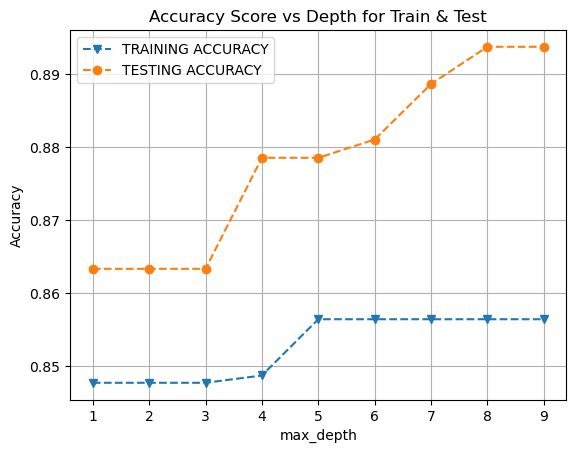

In [151]:
plot_my_scores(train_accuracy, test_accuracy)

### DecisionTreeClassifier : split-size vs depth

In [166]:
test_size = [0.3, 0.5, 0.6, 0.8]
train_accuracy_tsize=[]
test_accuracy_tsize=[]

for tsize in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsize, random_state=42)
    best_train_accuracy = max(accuracy_score(X_train,y_train))
    train_accuracy_tsize.append(best_train_accuracy)
    
    best_test_accuracy = max(accuracy_score(X_test,y_test))
    test_accuracy_tsize.append(best_test_accuracy)
    
    print(f'Training Accuracy => {best_train_accuracy}')
    print(f'Test Accuracy => {best_test_accuracy}')
    print(f'*************************************')

Training Accuracy => 0.8564
Test Accuracy => 0.8937
*************************************
Training Accuracy => 0.8676
Test Accuracy => 0.8752
*************************************
Training Accuracy => 0.88
Test Accuracy => 0.8682
*************************************
Training Accuracy => 0.8969
Test Accuracy => 0.865
*************************************


### Plot -2 : Accuracy scores for various depths vs split-size

In [180]:
def plot_my_scores_2(train_accuracy_tsize, test_accuracy_tsize):
    plt.plot(test_size, train_accuracy_tsize, '--v', label = 'TRAIN (**Best**) Accuracy (depths 1 - 10)')
    plt.plot(test_size, test_accuracy_tsize, '--o', label = 'TEST (**Best**) Accuracy (depths 1 - 10)')
    plt.xticks(test_size)
    plt.legend()
    plt.title('Best Train vs Test Accuracy (depths 1 - 10)')
    plt.xlabel('test_size')
    plt.ylabel('Accuracy')
    plt.grid();
    
    return

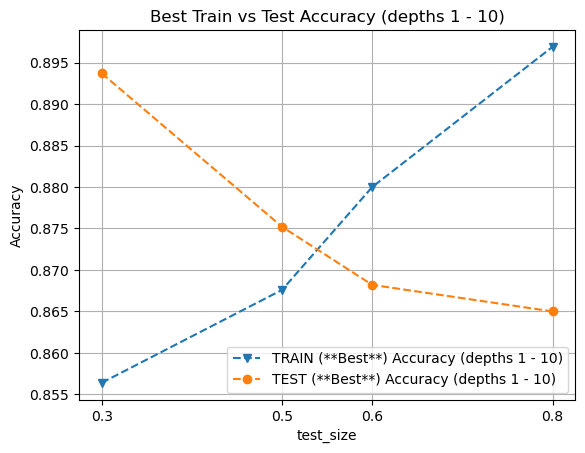

In [181]:
plot_my_scores_2(train_accuracy_tsize, test_accuracy_tsize)

### DecisionTreeClassifier accuracy score using test_size = 0.8 & max_depth = 5

In [186]:
# TRAIN accuracy score for max_depth = 5 & test_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
dtree_5=DecisionTreeClassifier(max_depth = 5).fit(X_train,y_train)
best_train_accuracy_5 = round(dtree_5.score(X_train,y_train),4)
best_test_accuracy_5 = round(dtree_5.score(X_test,y_test),4)
print('best_train_accuracy_5 ',best_train_accuracy_5)
print('best_test_accuracy_5 ',best_test_accuracy_5)

best_train_accuracy_5  0.8779
best_test_accuracy_5  0.8213


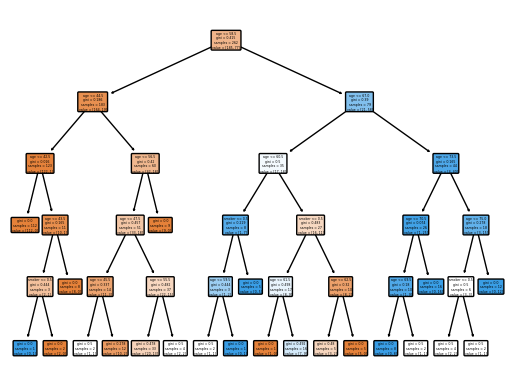

In [191]:
dtree_graph = plot_tree(dtree_5, feature_names=X_train.columns, rounded = True, filled = True)
plt.gcf().savefig('tree-plot.png', dpi = 300, bbox_inches = "tight")

### Ginnie Impurity

In [187]:
# The lower the GINI impurity, the better the correlation to the target data